In [1]:
#import cmapBQ
import os
import numpy as np
import requests
import matplotlib.pyplot as plt
import psutil

In [2]:
import sys
sys.path.insert(0,'/home/olgan96/.env/lib/python3.11/site-packages/')

In [3]:
import pandas as pd
from tqdm import tqdm

In [4]:
import cmapBQ.query as cmap_query
import cmapBQ.config as cmap_config

In [5]:
# URL with credentials
url = ('https://s3.amazonaws.com/data.clue.io/api/bq_creds/BQ-demo-credentials.json')

response = requests.get(url)
credentials_filepath='BQ-demo-credentials.json'

with open(credentials_filepath, 'w') as f:
    f.write(response.text)

# Set up credentials
cmap_config.setup_credentials(credentials_filepath)
bq_client = cmap_config.get_bq_client()

In [6]:
cmap_query.list_tables()

_includes_clustered_tables: <bound method TableDirectory._includes_clustered_tables of TableDirectory(compoundinfo='cmap-big-table.cmap_lincs_public_views.compoundinfo', genetic_pertinfo='cmap-big-table.cmap_lincs_public_views.genetic_pertinfo', geneinfo='cmap-big-table.cmap_lincs_public_views.geneinfo', cellinfo='cmap-big-table.cmap_lincs_public_views.cellinfo', instinfo='cmap-big-table.cmap_lincs_public_views.instinfo', siginfo='cmap-big-table.cmap_lincs_public_views.siginfo', level3='cmap-big-table.cmap_lincs_public_views.L1000_Level3_cid', level3_rid='cmap-big-table.cmap_lincs_public_views.L1000_Level3_rid', level3_landmark='cmap-big-table.cmap_lincs_public_views.L1000_Level3_landmark', level4='cmap-big-table.cmap_lincs_public_views.L1000_Level4_cid', level4_rid='cmap-big-table.cmap_lincs_public_views.L1000_Level4_rid', level4_landmark='cmap-big-table.cmap_lincs_public_views.L1000_Level4_landmark', level5='cmap-big-table.cmap_lincs_public_views.L1000_Level5_cid', level5_rid='cmap-b

In [ ]:
config = cmap_config.get_default_config()
instinfo = config.tables.instinfo
QUERY = ( 'SELECT * from `{}`')
QUERY = QUERY.format(instinfo)
instinfo = cmap_query.run_query(bq_client, QUERY).result().to_dataframe()

In [9]:
#siginfo_tumor_cp = pd.read_parquet('../../NO_BACKUP/lincs_2020/sig_info.parquet')

In [17]:
cellinfo = pd.read_parquet('../../NO_BACKUP/lincs_2020/cell_info.parquet')

In [18]:
cellinfo

,index,cell_iname,cellosaurus_id,donor_age,donor_age_death,donor_disease_age_onset,doubling_time,growth_medium,provider_catalog_id,feature_id,...,donor_ethnicity,donor_sex,donor_tumor_phase,cell_lineage,primary_disease,subtype,provider_name,growth_pattern,ccle_name,cell_alias
0,2,AG06263_2,None,None,<NA>,,None,None,None,None,...,Unknown,Unknown,Unknown,unknown,unknown,unknown,None,unknown,None,None
1,3,AG06840_A,None,None,<NA>,,None,None,None,None,...,Unknown,Unknown,Unknown,unknown,unknown,unknown,None,unknown,None,None
2,4,AG078N1_1,None,None,<NA>,,None,None,None,None,...,Unknown,Unknown,Unknown,unknown,unknown,unknown,None,unknown,None,None
3,5,C42,None,None,<NA>,,None,None,None,None,...,Unknown,Unknown,Unknown,unknown,unknown,unknown,None,unknown,None,None
4,7,HAP1,None,None,<NA>,,None,None,None,None,...,Unknown,Unknown,Unknown,unknown,unknown,chronic myeloid leukemia (cml),None,unknown,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,243,RCC10RGB,CVCL_1647,None,<NA>,None,108,DMEM+ 1%FBS,None,c-526,...,Unknown,M,Unknown,kidney,kidney cancer,carcinoma,RIKEN,adherent,RCC10RGB_KIDNEY,10RGB
192,244,OVK18,CVCL_3770,None,<NA>,None,36,MEM + 1% FBS,None,c-148,...,Unknown,F,Unknown,ovary,ovarian cancer,carcinoma,RIKEN,adherent,OVK18_OVARY,OVK-18
193,245,JHUEM2,CVCL_4656,None,<NA>,None,48,DMEM/F12 (Hyclone Cat.# SH323.1),None,c-187,...,Unknown,F,Primary,endometrium,endometrial cancer,carcinoma,RIKEN,adherent,JHUEM2_ENDOMETRIUM,JHUEM-2
194,246,OVCAR8,CVCL_1629,None,<NA>,None,60,RPMI-164 ATCC catalog # 3-21,None,c-349,...,Unknown,F,Primary,ovary,ovarian cancer,carcinoma,NCI/DCTD,adherent,OVCAR8_OVARY,OVCAR-8|NIH:OVCAR-8


In [13]:
df_meta = pd.read_parquet('../../NO_BACKUP/tahoe/obs_metadata_filtered.parquet')

In [21]:
cellinfo['cellosaurus_id'][cellinfo['cellosaurus_id'].isin(df_meta['cell_line'])]

54     CVCL_0293
65     CVCL_0023
69     CVCL_1478
77     CVCL_1571
91     CVCL_0320
92     CVCL_0399
95     CVCL_0504
96     CVCL_0546
101    CVCL_0179
103    CVCL_0332
114    CVCL_0359
123    CVCL_0028
Name: cellosaurus_id, dtype: object

In [29]:
cellinfo[cellinfo['cellosaurus_id'].isin(df_meta['cell_line'])]['cell_iname'].unique()

array(['HEC1A', 'A549', 'NCIH1573', 'NCIH596', 'HT29', 'LOVO', 'RKO',
       'SW480', 'BT474', 'HS578T', 'J82', 'AN3CA'], dtype=object)

In [23]:
df = pd.read_parquet('../../NO_BACKUP/lincs_2020/signature_response_features_r2_top0.7_final.parquet')

In [27]:
df[df['cellosaurus_id'].isin(cellinfo['cellosaurus_id'][cellinfo['cellosaurus_id'].isin(df_meta['cell_line'])].unique())]['cellosaurus_id'].unique()

array(['CVCL_0320', 'CVCL_0023', 'CVCL_0293', 'CVCL_1478', 'CVCL_0332',
       'CVCL_0028', 'CVCL_0179', 'CVCL_1571', 'CVCL_0359'], dtype=object)

In [122]:
instinfo['cell_iname']

0             PC3
1             PC3
2            U2OS
3            A375
4            HA1E
            ...  
3027591    SNU761
3027592    SNU761
3027593    SNU761
3027594    U251MG
3027595    U251MG
Name: cell_iname, Length: 3027596, dtype: object

In [123]:
instinfo = instinfo[instinfo['cell_iname'].isin(cellinfo[cellinfo['cellosaurus_id'].isin(df_meta['cell_line'])]['cell_iname'].unique())]

In [124]:
instinfo = instinfo[(instinfo['qc_pass'] >=1)&(instinfo['pert_time'] == 24)]

In [125]:
inst = instinfo[(instinfo['pert_idose'] == '0.05 uM')|(instinfo['pert_idose'] == '0.5 uM')|(instinfo['pert_idose'] == '5 uM')]

In [126]:
cellinfo[cellinfo['cell_iname'].isin(instinfo['cell_iname'])]

,index,cell_iname,cellosaurus_id,donor_age,donor_age_death,donor_disease_age_onset,doubling_time,growth_medium,provider_catalog_id,feature_id,...,donor_ethnicity,donor_sex,donor_tumor_phase,cell_lineage,primary_disease,subtype,provider_name,growth_pattern,ccle_name,cell_alias
54,94,HEC1A,CVCL_0293,71,<NA>,None,48,McCoys5A (Hyclone Cat.# SH32.1),None,c-10,...,Unknown,F,Unknown,endometrium,endometrial cancer,adenocarcinoma,None,adherent,HEC1A_ENDOMETRIUM,HEC-1-A
65,113,A549,CVCL_0023,58,<NA>,None,48,F-12K ATCC catalog # 3-24,CCL-185,c-4,...,Caucasian,M,Primary,lung,lung cancer,non small cell carcinoma,ATCC,adherent,A549_LUNG,A 549
69,117,NCIH1573,CVCL_1478,35,<NA>,None,48,RPMI-164 Invitrogen catalog # 11875-93,CRL-5877,c-179,...,Caucasian,F,Metastatic,lung,lung cancer,non small cell lung carcinoma,ATCC,adherent,NCIH1573_LUNG,NCI-H1573|H-1573
77,125,NCIH596,CVCL_1571,73,<NA>,None,48,RPMI-164 (Hyclone Cat.# SH327.2),HTB-178,c-123,...,Caucasian,M,Primary,lung,lung cancer,non small cell lung carcinoma,ATCC,adherent,NCIH596_LUNG,NCI-H596|H-596
91,139,HT29,CVCL_0320,44,<NA>,None,36,McCoy's 5A Invitrogen catalog # 166-82,HTB-38,c-272,...,Caucasian,F,Primary,large_intestine,colon cancer,adenocarcinoma,ATCC,adherent,HT29_LARGE_INTESTINE,HT 29
101,149,BT474,CVCL_0179,60,<NA>,None,120,Hybricare medium ATCC catalog # 46-X,HTB-20,c-550,...,Caucasian,F,Primary,breast,breast cancer,carcinoma,ATCC,adherent,BT474_BREAST,BT-474
103,151,HS578T,CVCL_0332,74,<NA>,None,>120,DMEM ATCC catalog # 3-22,HTB-126,None,...,Caucasian,F,Primary,breast,breast cancer,carcinoma,ATCC,adherent,HS578T_BREAST,578T
114,162,J82,CVCL_0359,58,<NA>,None,48,MEM (Invitrogen catalogue #12571-63),HTB-1,c-105,...,Caucasian,M,Primary,urinary_tract,bladder cancer,carcinoma,ATCC,adherent,J82_URINARY_TRACT,J 82
123,171,AN3CA,CVCL_0028,55,<NA>,None,48,MEM (Invitrogen catalogue #12571-63),HTB-111,c-110,...,Caucasian,F,Metastatic,endometrium,endometrial cancer,adenocarcinoma,ATCC,adherent,AN3CA_ENDOMETRIUM,AN-3|AN3-CA


In [127]:
df_meta_cell = df_meta[df_meta['cell_line'].isin(cellinfo[cellinfo['cell_iname'].isin(instinfo['cell_iname'])]['cellosaurus_id'].unique())]

In [66]:
cellinfo[cellinfo['cell_iname'].isin(sig['cell_iname'])]['cellosaurus_id'].unique()

array(['CVCL_0293', 'CVCL_0023', 'CVCL_1478', 'CVCL_0320', 'CVCL_0179'],
      dtype=object)

In [65]:
df_meta_cell[df_meta_cell['plate'] == 'plate1']

,plate,BARCODE_SUB_LIB_ID,sample,gene_count,tscp_count,mread_count,drugname_drugconc,drug,cell_line,sublibrary,BARCODE,pcnt_mito,S_score,G2M_score,phase,pass_filter,cell_name
13742006,plate1,01_001_048-lib_841,smp_1495,1749,2521,2963,"[('Infigratinib', 0.05, 'uM')]",Infigratinib,CVCL_0293,lib_841,01_001_048,0.056724,0.242857,0.308791,G2M,full,HEC-1-A
13742035,plate1,01_009_081-lib_841,smp_1495,3756,6607,7815,"[('Infigratinib', 0.05, 'uM')]",Infigratinib,CVCL_0293,lib_841,01_009_081,0.026638,0.228571,0.149817,S,full,HEC-1-A
13742038,plate1,01_010_049-lib_841,smp_1495,3659,7288,8583,"[('Infigratinib', 0.05, 'uM')]",Infigratinib,CVCL_1478,lib_841,01_010_049,0.058864,-0.257143,0.249267,G2M,full,NCI-H1573
13742048,plate1,01_012_014-lib_841,smp_1495,909,1221,1424,"[('Infigratinib', 0.05, 'uM')]",Infigratinib,CVCL_0320,lib_841,01_012_014,0.051597,-0.061905,0.015018,G2M,full,HT-29
13742056,plate1,01_013_158-lib_841,smp_1495,2418,4196,4939,"[('Infigratinib', 0.05, 'uM')]",Infigratinib,CVCL_0179,lib_841,01_013_158,0.033127,-0.042857,-0.089560,G1,full,BT-474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16955511,plate1,93_185_090-lib_912,smp_1587,846,1100,1277,"[('Anastrozole', 0.05, 'uM')]",Anastrozole,CVCL_0293,lib_912,93_185_090,0.087273,-0.005013,0.024291,G2M,full,HEC-1-A
16955520,plate1,93_187_075-lib_912,smp_1587,958,1308,1563,"[('Anastrozole', 0.05, 'uM')]",Anastrozole,CVCL_0293,lib_912,93_187_075,0.074924,-0.048075,-0.038001,G1,full,HEC-1-A
16955523,plate1,93_187_185-lib_912,smp_1587,1503,2138,2532,"[('Anastrozole', 0.05, 'uM')]",Anastrozole,CVCL_0293,lib_912,93_187_185,0.068288,0.027683,0.048951,G2M,full,HEC-1-A
16955528,plate1,93_188_148-lib_912,smp_1587,1391,1952,2319,"[('Anastrozole', 0.05, 'uM')]",Anastrozole,CVCL_0293,lib_912,93_188_148,0.072746,-0.081795,-0.061649,G1,full,HEC-1-A


In [88]:
sig.columns

Index(['index', 'bead_batch', 'nearest_dose', 'pert_dose', 'pert_dose_unit',
       'pert_idose', 'pert_itime', 'pert_time', 'pert_time_unit',
       'cell_mfc_name', 'pert_mfc_id', 'nsample', 'cc_q75', 'ss_ngene', 'tas',
       'pct_self_rank_q25', 'wt', 'median_recall_rank_spearman',
       'median_recall_rank_wtcs_50', 'median_recall_score_spearman',
       'median_recall_score_wtcs_50', 'batch_effect_tstat',
       'batch_effect_tstat_pct', 'is_hiq', 'qc_pass', 'pert_id', 'sig_id',
       'pert_type', 'cell_iname', 'id', 'det_wells', 'det_plates',
       'distil_ids', 'build_name', 'project_code', 'cmap_name',
       'is_ncs_exemplar'],
      dtype='object')

In [80]:
matrix = cmap_query.cmap_matrix(bq_client, cid=list(sig['sig_id'].unique()), data_level='level3', verbose=False, feature_space='aig').data_df.T

Running query ... (1/1)
Total bytes processed: 5.4GiB
Total bytes billed: 5.4GiB
Pivoting Dataframes to GCT objects
Complete


In [108]:
instinfo.columns

,bead_batch,nearest_dose,pert_dose,pert_dose_unit,pert_idose,pert_time,pert_itime,pert_time_unit,cell_mfc_name,pert_mfc_id,...,pert_type,cell_iname,id,qc_pass,dyn_range,inv_level_10,build_name,failure_mode,project_code,cmap_name
0,b12,NaN,NaN,None,None,72.0,72 h,h,PC3,SIMEG3_NO.2,...,trt_si,PC3,<NA>,1,9.18660,3840.0,None,None,PAL,MEG3
1,b16,NaN,NaN,None,None,24.0,24 h,h,PC3,DMSO,...,ctl_vehicle,PC3,<NA>,1,12.68110,2644.0,None,None,DTAK,DMSO
2,b32,NaN,NaN,None,None,24.0,24 h,h,U2OS,DMSO,...,ctl_vehicle,U2OS,<NA>,1,14.34060,3305.5,None,None,MOA,DMSO
3,b40,NaN,NaN,None,None,96.0,96 h,h,A375,CMAP-000,...,ctl_untrt,A375,<NA>,1,15.47770,7112.0,None,None,OFL,UnTrt
4,b40,NaN,NaN,None,None,96.0,96 h,h,HA1E,BRDN0002992044,...,trt_oe,HA1E,<NA>,1,12.96920,6530.0,None,None,OFL,TRAF3IP2-AS1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3027591,b44,NaN,NaN,Unknown,None,96.0,96 h,h,SNU761.311,BRDN0001146448,...,trt_xpr,SNU761,<NA>,<NA>,8.36785,6142.0,None,None,XPR,TLK2
3027592,b44,NaN,NaN,Unknown,None,96.0,96 h,h,SNU761.311,BRDN0003828231,...,trt_xpr,SNU761,<NA>,<NA>,9.39640,6258.0,None,None,XPR,USP19
3027593,b44,NaN,NaN,Unknown,None,96.0,96 h,h,SNU761.311,BRDN0003578050,...,trt_xpr,SNU761,<NA>,<NA>,11.45170,5691.5,None,None,XPR,ZMYM3
3027594,b44,NaN,NaN,Unknown,None,96.0,96 h,h,U251MG.311,BRDN0001489827,...,trt_xpr,U251MG,<NA>,<NA>,16.79250,5827.0,None,None,XPR,TRPC6


In [109]:
instinfo.columns

Index(['bead_batch', 'nearest_dose', 'pert_dose', 'pert_dose_unit',
       'pert_idose', 'pert_time', 'pert_itime', 'pert_time_unit',
       'cell_mfc_name', 'pert_mfc_id', 'det_plate', 'det_well', 'rna_plate',
       'rna_well', 'count_mean', 'count_cv', 'qc_f_logp', 'qc_iqr', 'qc_slope',
       'pert_id', 'sample_id', 'pert_type', 'cell_iname', 'id', 'qc_pass',
       'dyn_range', 'inv_level_10', 'build_name', 'failure_mode',
       'project_code', 'cmap_name'],
      dtype='object')

In [117]:
instinfo#'sample_id']

,bead_batch,nearest_dose,pert_dose,pert_dose_unit,pert_idose,pert_time,pert_itime,pert_time_unit,cell_mfc_name,pert_mfc_id,...,pert_type,cell_iname,id,qc_pass,dyn_range,inv_level_10,build_name,failure_mode,project_code,cmap_name
0,b12,NaN,NaN,None,None,72.0,72 h,h,PC3,SIMEG3_NO.2,...,trt_si,PC3,<NA>,1,9.18660,3840.0,None,None,PAL,MEG3
1,b16,NaN,NaN,None,None,24.0,24 h,h,PC3,DMSO,...,ctl_vehicle,PC3,<NA>,1,12.68110,2644.0,None,None,DTAK,DMSO
2,b32,NaN,NaN,None,None,24.0,24 h,h,U2OS,DMSO,...,ctl_vehicle,U2OS,<NA>,1,14.34060,3305.5,None,None,MOA,DMSO
3,b40,NaN,NaN,None,None,96.0,96 h,h,A375,CMAP-000,...,ctl_untrt,A375,<NA>,1,15.47770,7112.0,None,None,OFL,UnTrt
4,b40,NaN,NaN,None,None,96.0,96 h,h,HA1E,BRDN0002992044,...,trt_oe,HA1E,<NA>,1,12.96920,6530.0,None,None,OFL,TRAF3IP2-AS1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3027591,b44,NaN,NaN,Unknown,None,96.0,96 h,h,SNU761.311,BRDN0001146448,...,trt_xpr,SNU761,<NA>,<NA>,8.36785,6142.0,None,None,XPR,TLK2
3027592,b44,NaN,NaN,Unknown,None,96.0,96 h,h,SNU761.311,BRDN0003828231,...,trt_xpr,SNU761,<NA>,<NA>,9.39640,6258.0,None,None,XPR,USP19
3027593,b44,NaN,NaN,Unknown,None,96.0,96 h,h,SNU761.311,BRDN0003578050,...,trt_xpr,SNU761,<NA>,<NA>,11.45170,5691.5,None,None,XPR,ZMYM3
3027594,b44,NaN,NaN,Unknown,None,96.0,96 h,h,U251MG.311,BRDN0001489827,...,trt_xpr,U251MG,<NA>,<NA>,16.79250,5827.0,None,None,XPR,TRPC6


In [116]:
sig#.sig_id

8373                      ASG002_HT29_24H:G21
10582     ERAM001_A549_24H:BRD-K85606544:0.53
14597                   PBIOA015_A549_24H:G10
25504                   PBIOA014_A549_24H:F18
42503                   REP.A020_A549_24H:M05
                         ...                 
584601     PCL001_HT29_24H:BRD-K61498099:0.56
585251                  REP.B028_A549_24H:C04
594056                  PBIOA015_HT29_24H:H10
600306                  REP.B001_A549_24H:P21
609462                  PBIOA021_HT29_24H:N06
Name: sig_id, Length: 97, dtype: object

In [119]:
matrix = cmap_query.cmap_matrix(bq_client, cid=['PAL001_PC3_XH_X1_B12:H09'], data_level='level3', verbose=False, feature_space='aig').data_df.T

Running query ... (1/1)
Total bytes processed: 0.0B
Total bytes billed: 0.0B
Pivoting Dataframes to GCT objects
Complete


(array([  8.,   9.,  69., 215., 199., 182., 194.,  80.,  34.,  10.]),
 array([ 0. ,  1.5,  3. ,  4.5,  6. ,  7.5,  9. , 10.5, 12. , 13.5, 15. ]),
 <BarContainer object of 10 artists>)

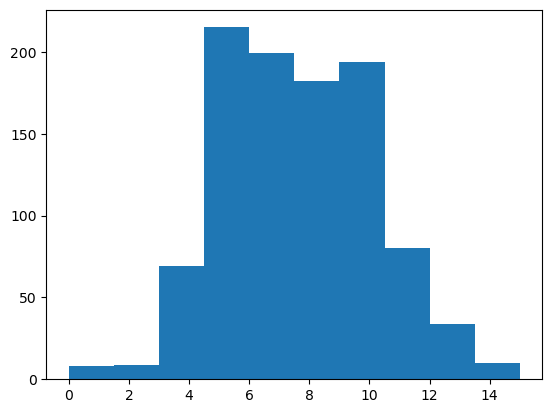

In [130]:
plt.hist(matrix.values[0][:1000])

In [82]:
matrix.reset_index().rename(columns={'cid': 'sig_id'}).merge(sig, on='sig_id').to_parquet('../../NO_BACKUP/lincs_2020/lvl3.parquet', index=False)

(array([ 4., 14., 37., 30.,  6.,  2.,  1.,  2.,  0.,  1.]),
 array([-1.83360004, -1.15165658, -0.46971312,  0.21223035,  0.89417381,
         1.57611728,  2.25806074,  2.94000421,  3.62194767,  4.30389113,
         4.9858346 ]),
 <BarContainer object of 10 artists>)

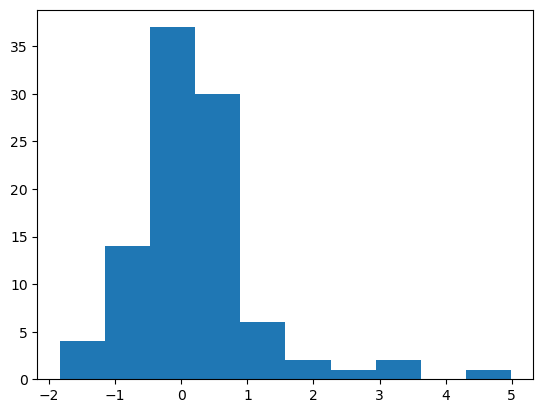

In [71]:
plt.hist(matrix['10013'])